<div align="right">Massimo Nocentini<br>May 21, 2016: basics, subsets sums</div>

<div align="center">
**Abstract**<br>
This document collect some examples about *bit manipulation techniques* and some application of them to contest problems
</div>

# Intro

The current notebook born with the aim to collect introductory material, references, tutorial, code snippet and challenging problems around the topic of *bit manipulation techniques*. It follows to fullfil our need to get a deep understanding of this topic to be competitive in programming (contests).

First of all a collection of general references follows:

   - [__The Aggregate Magic Algorithms__][aggregate], by _Department of Electrical and Computer Engineering at the University of Kentucky_
   - [__Bit Twiddling Hacks__][seander], by _Sean Eron Anderson_
   
On the other hand, the following pages have a spirit toward programming contests:

   - [__CPSC 490 202 - Problem Solving in Computer Science__][CPSC 490 202 current] ([old][CPSC 490 202 old] version)
   
[aggregate]:http://aggregate.org/MAGIC/
[seander]:http://graphics.stanford.edu/~seander/bithacks.html

[CPSC 490 202 old]:http://www.ugrad.cs.ubc.ca/~cs490/sec202/
[CPSC 490 202 current]:http://www.ugrad.cs.ubc.ca/~cs490/2015W2/

# *bit masking* core idea

In this section we study [this][basic] introductory document, where the first paragraph reads:

>Suppose you have a set of objects and you want some way to represent which objects to pick and
which ones not to pick. How do you represent that in in a program? More generally, *how do you
represent a subest of a set*? We can represent whether an object *is picked or not by a single bit*! Using a boolean to represent this is an overkill in terms of memory usage. However, neither C++ nor Java has any data type representing a single bit, so how can we cut down the memory usage?
**The answer is to use an integer!** We know an integer is just a bunch of bits stringed together, so
why don’t we use the integer to represent the entire set?

> For example, suppose in a set of 5 objects, we have picked the 1st, 3rd, and 4th object. The bitmask to represent this in binary is 01101 or 13 in decimal (in the notes, the 1st bit will always be the least significant bit and
will always appear at the very right). *We have just cut down the memory usage from five booleans to
a single integer*!

Then follows a list of basic manipulations, which we coded in [this][our:bits] Python module, loaded in the next cell; two functions deserve attention, namely `subsets` and `subsets_of`, read the docstring for info.

[basic]:http://www.ugrad.cs.ubc.ca/~cs490/sec202/notes/intro/bitmask.pdf
[our:bits]:https://github.com/massimo-nocentini/competitive-programming/blob/master/python-libs/bits.py

In [12]:
%matplotlib inline
%run ../python-libs/bits.py
%run ../python-libs/timing.py

# Sum of subsets: a first example

## With "usual" subsets generation

Previous doc finishes with an first application of bitmasking, here the request:

>Bitmask is an efficient and convenient way to represent subsets. For example, **given a set of numbers,
we want to find the sum of all subsets**. This is easy to code using bitmasks. Furthermore, we can use
an array to store all the results (imagine storing the results when you are using an array to represent
the subset)!

The following cell contains a pythonic implementation of their code, which is given in `C`: generator `subsets` yields subsets one by one, such that a successor subset `s` is computed by a previous subset `p` by *increment*, namely `s = p + 1`.

In [20]:
def subsets_sums(S):
    """
    Returns a map of `(s, v)`, where `s` is a subset of `S`, and `v` is `sum(i in S & s)`.
    """
    n = len(S)
    sums = [0 for _ in range(1 << n)]
    for s in subsets(n):
        for j, v in enumerate(S):
            sums[s] += is_on(s, j, return_int=True) * v
    
    return sums

As a first experiment, let `S` be a list of 4 random integers, each one less than $2^{8}$.

In [21]:
from random import randrange
S = [randrange(1 << 8) for _ in range(1 << 2)]
S

[5, 118, 172, 97]

We time the execution of the function `subsets_sums` applied to `S` and bind `sums` to the resulting mapping:

In [22]:
with timing(lambda: subsets_sums(S)) as (sums, start, end):
    print("Elapsed time: {:.5} secs".format(end-start))

Elapsed time: 0.00027037 secs


Have a look at results, after the definition of the pretty printing utility `pretty_dict`:

In [23]:
def pretty_dict(sums):
    """
    Utility pretty printer.
    """
    return {pretty_mask(j, coding='little', width=len(S)): v for j, v in enumerate(sums)}

In [24]:
pretty_dict(sums)

{'0000': 0,
 '0001': 97,
 '0010': 172,
 '0011': 269,
 '0100': 118,
 '0101': 215,
 '0110': 290,
 '0111': 387,
 '1000': 5,
 '1001': 102,
 '1010': 177,
 '1011': 274,
 '1100': 123,
 '1101': 220,
 '1110': 295,
 '1111': 392}

### Repeating experiments

Moreover, we repeat the above experiment for lists of integers with different lengths to understand the *exponential* complexity of *subsets* enumeration: the longer list will have **24 integers** and it took aproximately **5 minutes** to return an answer.

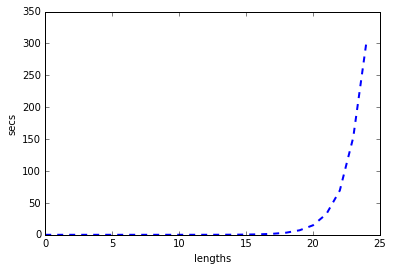

In [16]:
def doer(i):
    """
    Repeat the previous experiment with lists of integers with lengths up to `l`.
    """
    S = [randrange(1 << 8) for _ in range(i)]
    with timing(lambda: subsets_sums(S)) as (sums, start, end):
        return end - start

import matplotlib.pyplot as plt

l = range(25)
line, = plt.plot(l, list(map(doer, l)), '--', linewidth=2)

plt.xlabel("lengths")
plt.ylabel("secs")
plt.show()